# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Mahesa Masracesara
- **Email:** mahesa.masracesara@gmail.com
- **ID Dicoding:** mahesahesa12

Proyek ini bertujuan untuk menganalisis pola penggunaan layanan bike sharing
berdasarkan faktor waktu, musim, dan kondisi hari menggunakan Bike Sharing Dataset
(Capital Bikeshare, Washington D.C., 2011–2012).

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan rata-rata jumlah penyewaan sepeda (`cnt`)
   pada setiap musim selama tahun 2011–2012?

- Bagaimana perbedaan rata-rata jumlah penyewaan sepeda antara hari kerja dan hari libur selama tahun 2011–2012?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

- `import pandas as pd`  
  Digunakan untuk mengolah dan menganalisis data dalam bentuk tabel (DataFrame).

- `import numpy as np`  
  Digunakan untuk operasi numerik dan perhitungan berbasis array.

- `import matplotlib.pyplot as plt`  
  Digunakan untuk membuat visualisasi data seperti grafik dan plot.

- `import seaborn as sns`  
  Digunakan untuk visualisasi data dengan tampilan yang lebih rapi dan informatif.

- `sns.set(style="whitegrid")`  
  Mengatur gaya tampilan grafik Seaborn menjadi **whitegrid**, yaitu latar putih dengan garis grid agar grafik lebih mudah dibaca.

## Data Wrangling

### Gathering Data
mengumpulkan semua data yang dibutuhkan.

In [4]:
# Load dataset
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

# Tampilkan 5 data teratas
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Load Dataset

- `day_df = pd.read_csv("day.csv")`  
  Digunakan untuk memuat dataset **day.csv** ke dalam DataFrame `day_df`.

- `hour_df = pd.read_csv("hour.csv")`  
  Digunakan untuk memuat dataset **hour.csv** ke dalam DataFrame `hour_df`.

### Menampilkan Data

- `day_df.head()`  
  Digunakan untuk menampilkan **5 baris data teratas** dari DataFrame `day_df` untuk melihat struktur dan isi awal data.


**Insight:**
- Dataset yang digunakan adalah Bike Sharing Dataset yang berisi data penyewaan sepeda harian dan per jam selama tahun 2011–2012.
- Pada analisis ini, data utama yang digunakan adalah `day.csv` karena sesuai untuk analisis **tren** dan pola jangka menengah hingga panjang.

### Assessing Data
menilai kualitas dari seluruh data yang akan digunakan. Penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut.


In [5]:
# Data day.csv
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- `day_df.info()`  
  Menampilkan ringkasan struktur DataFrame seperti jumlah kolom, tipe data, dan nilai non-null.

In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


- `day_df.isna().sum()`  
  Menampilkan jumlah **nilai kosong (missing values)** pada setiap kolom DataFrame.


In [7]:
print("Jumlah Duplikasi", day_df.duplicated().sum())

Jumlah Duplikasi 0


- `print("Jumlah Duplikasi", day_df.duplicated().sum())`  
  Menampilkan jumlah **baris data duplikat** dalam DataFrame.

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- `day_df.describe()`  
  Menampilkan statistik deskriptif data numerik seperti **mean, median, minimum, maksimum, dan standar deviasi**.


In [9]:
# data hour.csv
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- `hour_df.info()`  
  Menampilkan ringkasan struktur DataFrame `hour_df` seperti jumlah kolom, tipe data, dan nilai non-null.


In [10]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


- `hour_df.isna().sum()`  
  Menampilkan jumlah **nilai kosong (missing values)** pada setiap kolom DataFrame `hour_df`.


In [11]:
print("Jumlah Duplikasi", hour_df.duplicated().sum())

Jumlah Duplikasi 0


- `print("Jumlah Duplikasi", hour_df.duplicated().sum())`  
  Menampilkan jumlah **baris data duplikat** dalam DataFrame `hour_df`.


In [12]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- `day_df.describe()`  
  Menampilkan ringkasan **statistik deskriptif** data numerik pada DataFrame `day_df`.


**Insight:**
- Dataset memiliki kualitas data yang sangat baik karena tidak terdapat missing value maupun data duplikat. Namun, terdapat beberapa kolom yang memerlukan penyesuaian tipe data agar sesuai dengan makna dan tujuan analisis.
- Rata-rata jumlah penyewaan sepeda per hari adalah sekitar 848 sepeda, dengan variasi yang cukup besar hingga mencapai 3.410 sepeda per hari. Variabel waktu dan kondisi hari seperti musim dan hari kerja berpotensi besar memengaruhi pola penyewaan sepeda.

### Cleaning Data

In [13]:
# Konversi kolom tanggal ke tipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

- `pd.to_datetime()`  
  Mengonversi kolom **`dteday`** pada `day_df` dan `hour_df` ke tipe **datetime** agar mudah dianalisis berbasis waktu.


In [14]:
# Konversi ke Kategorikal (day.csv)
categorical_cols_day = [
    'season', 'yr', 'mnth', 'holiday',
    'weekday', 'workingday', 'weathersit'
]

for col in categorical_cols_day:
    day_df[col] = day_df[col].astype('category')

- Mengonversi kolom pada `categorical_cols_day` menjadi tipe **category** agar data kategorikal lebih efisien dan mudah dianalisis.


In [15]:
# Konversi ke Kategorikal (hour.csv)
categorical_cols_hour = [
    'season', 'yr', 'mnth', 'hr', 'holiday',
    'weekday', 'workingday', 'weathersit'
]

for col in categorical_cols_hour:
    hour_df[col] = hour_df[col].astype('category')

- Mengonversi kolom pada `categorical_cols_hour` menjadi tipe **category** agar data kategorikal pada `hour_df` lebih efisien dan mudah dianalisis.


In [16]:
# Pengecekan kembali tipe data day.csv
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

- `day_df.info()`  
  Menampilkan kembali struktur DataFrame untuk memastikan perubahan tipe data berhasil.

In [17]:
# Pengecekan kembali tipe data hour.csv
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

- `hour_df.info()`  
  Menampilkan kembali struktur DataFrame `hour_df` untuk memastikan perubahan tipe data berhasil.


**Insight:**
- Kolom `dteday` dikonversi ke tipe datetime agar analisis berbasis waktu dapat
  dilakukan dengan lebih akurat.
- Variabel seperti `season`, `weekday`, dan `weathersit` diperlakukan sebagai
  data kategorikal karena merepresentasikan kategori, bukan nilai numerik.
- Penyesuaian tipe data ini bertujuan untuk meningkatkan interpretabilitas dan
  mencegah kesalahan analisis pada tahap eksplorasi data.

## Exploratory Data Analysis (EDA)

### Explore Data day.csv & hour.csv

In [18]:
# melihat parameter statistik day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- `day_df.describe(include="all")`  
  Menampilkan statistik deskriptif **seluruh kolom**, baik numerik maupun kategorikal.


In [19]:
# melihat parameter statistik hour_df
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,2.0,12.0,24.0,2.0,7.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,7.0,16.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,8734.0,1488.0,730.0,16879.0,2512.0,11865.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- `hour_df.describe(include="all")`  
  Menampilkan statistik deskriptif **seluruh kolom** pada DataFrame `hour_df`, baik numerik maupun kategorikal.


In [20]:
# Statistik deskriptif jumlah penyewaan berdasarkan musim
day_df.groupby('season', observed=True)['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,181.0,2604.132597,1399.942119,431.0,1538.0,2209.0,3456.00,7836.0
2,184.0,4992.331522,1695.977235,795.0,4003.0,4941.5,6377.00,8362.0
3,188.0,5644.303191,1459.800381,1115.0,4586.5,5353.5,6929.25,8714.0
4,178.0,4728.162921,1699.615261,22.0,3615.5,4634.5,5624.50,8555.0


- `day_df.groupby('season', observed=True)['cnt'].describe()`  
  Menampilkan statistik deskriptif jumlah peminjaman (`cnt`) untuk setiap **musim (season)**.


In [21]:
# Statistik deskriptif jumlah penyewaan berdasarkan jenis hari
day_df.groupby('workingday', observed=True)['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


- `day_df.groupby('workingday', observed=True)['cnt'].describe()`  
  Menampilkan statistik deskriptif jumlah peminjaman (`cnt`) berdasarkan **hari kerja dan hari libur**. (1 = hari kerja), (2 = hari libur)


**Insight:**
- Statistik deskriptif menunjukkan bahwa data penyewaan sepeda memiliki variasi yang cukup besar baik pada tingkat harian maupun per jam, yang tercermin dari rentang nilai dan standar deviasi pada variabel `cnt`.
- Eksplorasi berdasarkan musim (`season`) memperlihatkan adanya perbedaan karakteristik distribusi jumlah penyewaan sepeda antar musim, ditunjukkan oleh perbedaan nilai median dan kuartil.
- Berdasarkan jenis hari (`workingday`), distribusi jumlah penyewaan sepeda pada hari kerja dan hari libur menunjukkan karakteristik yang berbeda, mengindikasikan potensi perbedaan pola penggunaan layanan.
- Temuan awal ini menunjukkan bahwa faktor waktu dan jenis hari berpotensi memengaruhi jumlah penyewaan sepeda, sehingga perlu dianalisis lebih lanjut pada tahap visualisasi dan explanatory analysis.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan rata-rata jumlah penyewaan sepeda (cnt) pada setiap musim selama tahun 2011–2012?

In [22]:
# Rata-rata jumlah penyewaan sepeda berdasarkan musim
season_avg = (
    day_df
    .groupby('season', observed=True)['cnt']
    .mean()
    .reset_index()
)

season_avg

,season,cnt
0,1,2604.132597
1,2,4992.331522
2,3,5644.303191
3,4,4728.162921


- Mengelompokkan data berdasarkan **season**, lalu menghitung **rata-rata jumlah peminjaman (`cnt`)** pada tiap musim, dan menyajikannya dalam bentuk DataFrame.


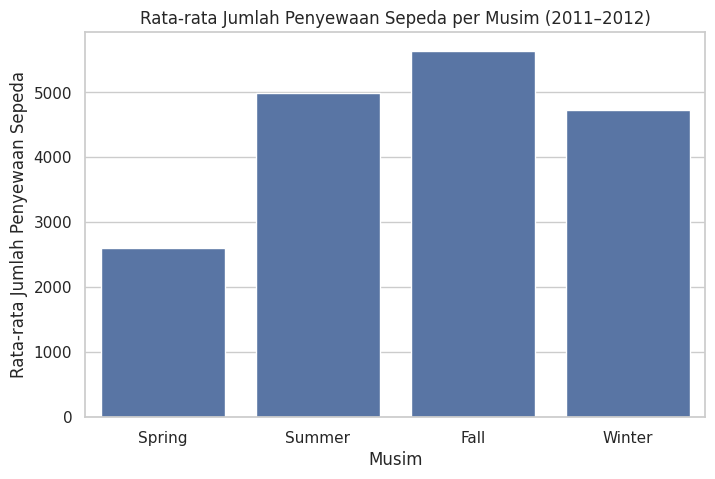

In [23]:
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

season_avg['season_label'] = season_avg['season'].map(season_mapping)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=season_avg,
    x='season_label',
    y='cnt'
)
plt.title('Rata-rata Jumlah Penyewaan Sepeda per Musim (2011–2012)')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.show()



- Membuat **mapping label musim** agar kode musim lebih mudah dibaca.
- Menambahkan kolom `season_label` ke DataFrame `season_avg`.
- Membuat **bar chart** untuk menampilkan rata-rata jumlah penyewaan sepeda per musim.
- Grafik diberi judul dan label sumbu agar mudah dipahami.


**Insight:**
- Rata-rata jumlah penyewaan sepeda berbeda pada setiap musim.
- Musim gugur (Fall) memiliki rata-rata penyewaan sepeda tertinggi, sedangkan musim semi (Spring) menunjukkan rata-rata penyewaan terendah.
- Hal ini menunjukkan bahwa kondisi musim berpengaruh terhadap tingkat penggunaan layanan bike sharing, di mana cuaca yang lebih nyaman cenderung meningkatkan aktivitas penyewaan sepeda.


### Pertanyaan 2: Bagaimana perbedaan rata-rata jumlah penyewaan sepeda antara hari kerja dan hari libur selama tahun 2011–2012?

In [24]:
# Rata-rata penyewaan berdasarkan jenis hari
workingday_avg = (
    day_df
    .groupby('workingday', observed=True)[['cnt', 'casual', 'registered']]
    .mean()
    .reset_index()
)

workingday_avg

,workingday,cnt,casual,registered
0,0,4330.168831,1371.134199,2959.034632
1,1,4584.820000,606.570000,3978.250000


- Mengelompokkan data berdasarkan **workingday**, lalu menghitung **rata-rata** peminjaman total (`cnt`), pengguna kasual (`casual`), dan pengguna terdaftar (`registered`).
- Hasilnya ditampilkan dalam bentuk DataFrame `workingday_avg`.


In [25]:
workingday_mapping = {
    0: 'Hari Libur',
    1: 'Hari Kerja'
}

workingday_avg['day_type'] = workingday_avg['workingday'].map(workingday_mapping)


- Membuat **mapping jenis hari** (hari kerja dan hari libur).
- Menambahkan kolom `day_type` ke DataFrame `workingday_avg` agar lebih mudah dibaca.


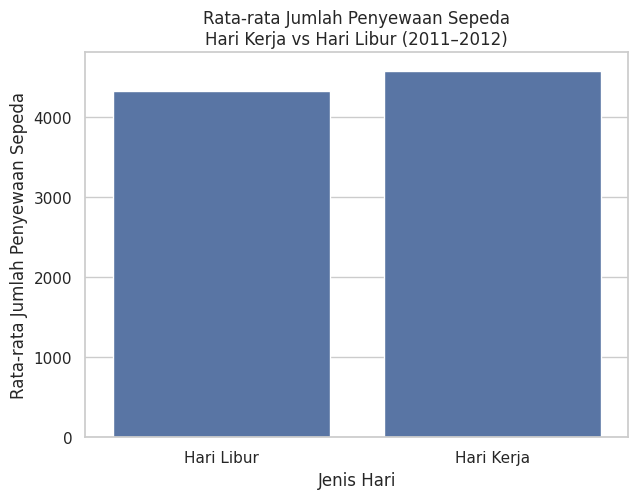

In [26]:
plt.figure(figsize=(7, 5))
sns.barplot(
    data=workingday_avg,
    x='day_type',
    y='cnt'
)
plt.title('Rata-rata Jumlah Penyewaan Sepeda\nHari Kerja vs Hari Libur (2011–2012)')
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.show()


- Membuat **bar chart** untuk membandingkan rata-rata jumlah penyewaan sepeda antara **hari kerja** dan **hari libur**.
- Grafik dilengkapi judul serta label sumbu agar mudah dipahami.


**Insight:**
- Rata-rata jumlah penyewaan sepeda pada hari kerja dan hari libur menunjukkan perbedaan pola penggunaan.
- Pada hari kerja, jumlah penyewaan sepeda cenderung lebih stabil dan didominasi oleh pengguna terdaftar (registered).
- Sementara itu, pada hari libur, proporsi pengguna kasual (casual) relatif lebih tinggi, yang mengindikasikan penggunaan layanan untuk aktivitas rekreasi.
- Perbedaan ini menunjukkan bahwa jenis hari memengaruhi perilaku pengguna dalam memanfaatkan layanan bike sharing.

## Analisis Lanjutan : Segmentasi Tingkat Permintaan Penyewaan Sepeda

Pada tahap analisis lanjutan ini, dilakukan segmentasi tingkat permintaan
penyewaan sepeda menggunakan teknik binning (manual grouping). Tujuan dari
analisis ini adalah untuk mengelompokkan jumlah penyewaan harian ke dalam
kategori yang lebih mudah diinterpretasikan dan dapat digunakan sebagai
dasar pengambilan keputusan operasional.

In [27]:
# Menentukan batas kategori
q33, q66 = day_df['cnt'].quantile([0.33, 0.66])

In [28]:
# Membuat segmentasi baru
day_df['demand_category'] = pd.cut(
    day_df['cnt'],
    bins=[-float('inf'), q33, q66, float('inf')],
    labels=['Low Demand', 'Medium Demand', 'High Demand']
)


In [29]:
# Evaluasi hasil segmentasi
day_df['demand_category'].value_counts()

,count
demand_category,
High Demand,249
Low Demand,241
Medium Demand,241


In [30]:
# Mencocokkan hasil dengan variabel lain
day_df.groupby('demand_category', observed=True)['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
demand_category,,,,,,,,
Low Demand,241.0,2294.439834,888.042997,22.0,1600.0,2294.0,3126.0,3709.0
Medium Demand,241.0,4492.991701,429.759429,3717.0,4123.0,4511.0,4835.0,5260.0
High Demand,249.0,6654.248996,847.297141,5267.0,5905.0,6685.0,7393.0,8714.0


**Insight:**
- Dengan menggunakan teknik binning, tingkat permintaan penyewaan sepeda
  berhasil dikelompokkan ke dalam tiga kategori: Low Demand, Medium Demand,
  dan High Demand.
- Segmentasi ini membantu menyederhanakan variasi jumlah penyewaan harian
  menjadi kelompok yang lebih mudah dianalisis.
- Segmentasi tingkat permintaan menjadi Low Demand, Medium Demand, dan High Demand digunakan untuk menyederhanakan variasi jumlah penyewaan harian agar lebih mudah diinterpretasikan. Dengan adanya segmentasi ini, pola
permintaan dapat dianalisis secara lebih terstruktur serta dikaitkan dengan
faktor lain seperti musim dan jenis hari. Hasil segmentasi ini juga memiliki
nilai praktis dalam mendukung pengambilan keputusan operasional, seperti
perencanaan kapasitas dan distribusi sepeda.

## Conclusion

- Conclution pertanyaan 1 : Bagaimana perbedaan rata-rata jumlah penyewaan sepeda pada setiap musim selama tahun 2011–2012?

Berdasarkan hasil analisis dan visualisasi data, rata-rata jumlah penyewaan
sepeda menunjukkan perbedaan yang jelas pada setiap musim. Musim gugur (Fall)
memiliki rata-rata penyewaan sepeda tertinggi, sedangkan musim semi (Spring)
menunjukkan rata-rata penyewaan terendah. Hal ini mengindikasikan bahwa faktor
musim dan kondisi cuaca berperan penting dalam memengaruhi tingkat penggunaan
layanan bike sharing.

- Conclution pertanyaan 2 : Bagaimana perbedaan rata-rata jumlah penyewaan sepeda antara hari kerja dan hari libur selama tahun 2011–2012?

Hasil analisis menunjukkan adanya perbedaan pola penyewaan sepeda antara hari
kerja dan hari libur. Pada hari kerja, penyewaan sepeda cenderung didominasi oleh
pengguna terdaftar (registered), yang mengindikasikan penggunaan untuk aktivitas
rutin seperti bekerja atau berangkat sekolah. Sementara itu, pada hari libur
terdapat peningkatan proporsi pengguna kasual (casual), yang mencerminkan
penggunaan layanan untuk tujuan rekreasi.

- Conclution Analisis Lanjutan :

Analisis lanjutan menggunakan teknik binning berhasil mengelompokkan
tingkat permintaan penyewaan sepeda ke dalam kategori Low Demand, Medium Demand,
dan High Demand. Segmentasi ini membantu menyederhanakan variasi jumlah penyewaan
harian dan memberikan gambaran yang lebih operasional untuk mendukung
perencanaan kapasitas serta distribusi sepeda.

In [31]:
dashboard_df = day_df[[
    'dteday',
    'season',
    'workingday',
    'cnt',
    'demand_category'
]]

dashboard_df.to_csv('main_data.csv', index=False)
